In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [3]:
startup = pd.read_csv("50_Startups.csv")

In [4]:
startup

,R&D_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [5]:
startup.head()

,R&D_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [6]:
startup.describe()

,R&D_Spend,Administration,Marketing_Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [7]:
# Correlation matrix 

startup.corr()

,R&D_Spend,Administration,Marketing_Spend,Profit
R&D_Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing_Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


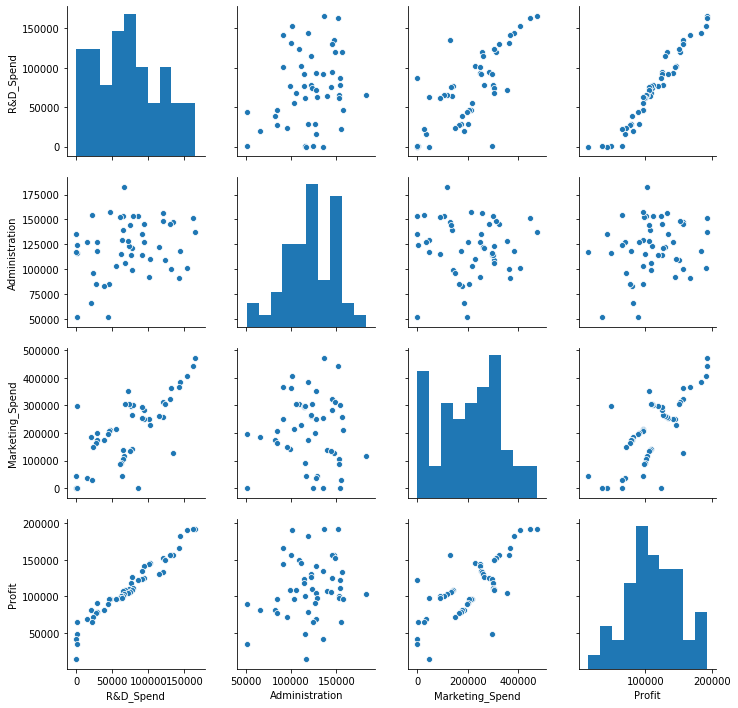

In [8]:
# Scatter plot between the variables along with histograms

import seaborn as sns
sns.pairplot(startup)

In [9]:
startup.columns

Index(['R&D_Spend', 'Administration', 'Marketing_Spend', 'State', 'Profit'], dtype='object')

In [10]:
# preparing model considering all the variables 

import statsmodels.formula.api as smf # for regression model

In [11]:
# Preparing model     

ml1 = smf.ols('Profit~Administration+Marketing_Spend+State',data=startup).fit() # regression model

In [12]:
# Getting coefficients of variables

ml1.params

Intercept            19031.939286
State[T.Florida]     -1703.702807
State[T.New York]     3875.762535
Administration           0.323894
Marketing_Spend          0.250706
dtype: float64

In [13]:
# Summary

ml1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                     17.83
Date:                Sun, 24 May 2020   Prob (F-statistic):           7.78e-09
Time:                        18:56:57   Log-Likelihood:                -576.91
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      45   BIC:                             1173.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          1.903e+04   1.84e+04      1.033      0.307   -1.81e+04    5.61e+04
State[T.Florida]  -1703.7028   9337.989     -0.182      0.856   -2.05e+04    1.71e+04
State[T.New York]  3875.7625   9002.603      0.431      0.669   -1.43e+04     2.2e+04
Administration        0.3239      0.133      2.426      0.019       0.055       0.593
Marketing_Spend       0.2507      0.031      7.997      0.000       0.188       0.314
==============================================================================
Omnibus:                        5.729   Durbin-Watson:                   1.266
Prob(Omnibus):                  0.057   Jarque-Bera (JB):                5.349
Skew:                          -0.461   Prob(JB):                       0.0689
Kurtosis:                       4.311   Cond. No.                     1.34e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.34e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
# preparing model based only on Administration

ml_a=smf.ols('Profit~Administration',data = startup).fit()  
ml_a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Sun, 24 May 2020   Prob (F-statistic):              0.162
Time:                        18:57:00   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
Administration     0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
# preparing model based only on Marketing_Spend

ml_m=smf.ols('Profit~Marketing_Spend',data = startup).fit()  
ml_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Sun, 24 May 2020   Prob (F-statistic):           4.38e-10
Time:                        18:57:03   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept            6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
Marketing_Spend     0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
# preparing model based only on state

ml_v=smf.ols('Profit~State',data = startup).fit()  
ml_v.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                 -0.018
Method:                 Least Squares   F-statistic:                    0.5748
Date:                Sun, 24 May 2020   Prob (F-statistic):              0.567
Time:                        18:57:04   Log-Likelihood:                -600.05
No. Observations:                  50   AIC:                             1206.
Df Residuals:                      47   BIC:                             1212.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          1.039e+05   9861.636     10.536      0.000    8.41e+04    1.24e+05
State[T.Florida]   1.487e+04   1.42e+04      1.050      0.299   -1.36e+04    4.34e+04
State[T.New York]  9851.2712   1.39e+04      0.706      0.483   -1.82e+04    3.79e+04
==============================================================================
Omnibus:                        0.111   Durbin-Watson:                   0.081
Prob(Omnibus):                  0.946   Jarque-Bera (JB):                0.207
Skew:                           0.104   Prob(JB):                        0.902
Kurtosis:                       2.762   Cond. No.                         3.70
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
# Preparing model based only on Administration and Marketing Spend

ml_am=smf.ols('Profit~Administration+Marketing_Spend',data = startup).fit()  
ml_am.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     36.71
Date:                Sun, 24 May 2020   Prob (F-statistic):           2.50e-10
Time:                        18:57:07   Log-Likelihood:                -577.13
No. Observations:                  50   AIC:                             1160.
Df Residuals:                      47   BIC:                             1166.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.022e+04   1.77e+04      1.143      0.259   -1.54e+04    5.58e+04
Administration      0.3237      0.131      2.468      0.017       0.060       0.588
Marketing_Spend     0.2488      0.030      8.281      0.000       0.188       0.309
==============================================================================
Omnibus:                        6.584   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                6.524
Skew:                          -0.512   Prob(JB):                       0.0383
Kurtosis:                       4.443   Cond. No.                     1.30e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""